In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 13
plt.rcParams['axes.spines.right'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['xtick.top'] = False

### Linear regression

Linear regression assumes that some recorded output values $y_i$ for $i=1,...,N_\mathrm{samples}$ depend linearly on some input values $\mathbf{x}_i$, and that any deviations are due to noise. Given $\mathbf{x}$-$y$ data, your task is then to rediscover the form of this linear mapping, which in the simplest case corresponds to fitting a line to the data. The question is merely how to select the best line?

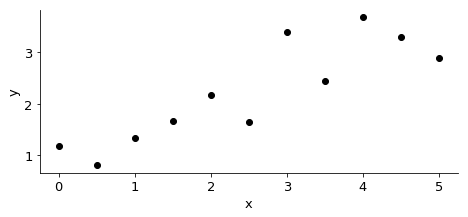

In [68]:
# Initialize
sigma = 0.5                             # noise std
nSamples = 11                            # number of samples
x = np.linspace(0, 5, nSamples)          # input values
lineFun = lambda w0, w1, x: w0 + w1*x    # linear mapping

# Generate y-data
w0 = 1    # intercept
w1 = 0.5  # slope
y = lineFun(w0, w1, x)
y += np.random.randn(nSamples)*sigma

plt.figure(figsize=(7.5, 3))
plt.plot(x, y, 'ko')
plt.xlabel('x')
plt.ylabel('y');

### Least squares

One approach for evaluating how good a line fits is by summing up the squared distances to each $y$-value from the line, and to compare this value for various lines. A lower value would indicate a better fit and a higher a worse fit. Usually, this sum is divided by the number of samples so as to get a mean squared error (MSE).

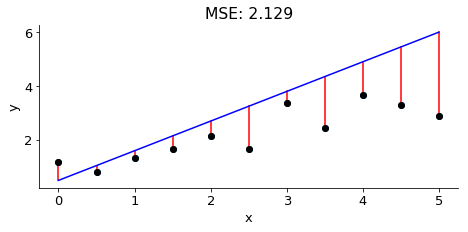

In [82]:
# Test line
w0Test = 0.5
w1Test = 1.1
yHat = lineFun(w0Test, w1Test, x)
mseFun = lambda y, yHat: np.mean((y-yHat)**2)
mseTest = mseFun(y, yHat)

plt.figure(figsize=(7.5, 3))
for xi, yi, yHati in zip(x, y, yHat): 
    plt.stem([xi], [yi], 'r', bottom=yHati)
plt.plot(x, yHat, 'b-')  
plt.plot(x, y, 'ko')
plt.xlabel('x')
plt.ylabel('y');
plt.title('MSE: ' + '%1.3f' % mseTest);

From the example above we can see that each line (unique combination of $w_0$ and $w_1$) obtains a slightly different MSE value. Our task is therefore to find the $w_0$ and $w_1$ combination with the lowest value. Naively, we can try to do this by simply testing various combinations and plotting the MSE value as a function of both $w_0$ and $w_1$.

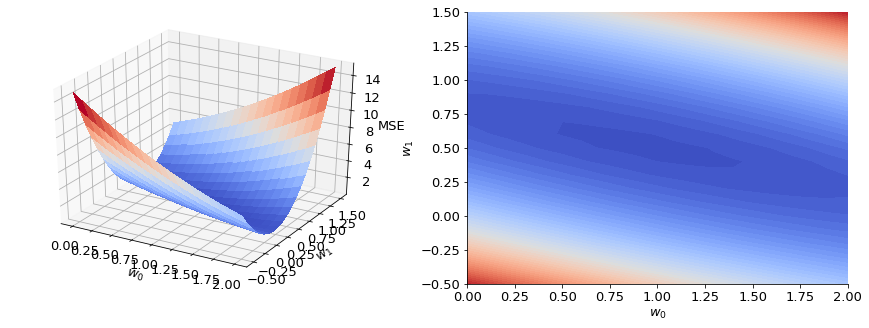

In [96]:
# Get w0 and w1 combinations over a grid
nGrid = 21
W0, W1 = np.meshgrid(np.linspace(w0-1, w0+1, nGrid), np.linspace(w1-1, w1+1, nGrid))

# Get the MSE for each combination
mseVals = np.zeros([nGrid, nGrid])
for i in range(nGrid):
    for j in range(nGrid):
        yHat = lineFun(W0[i, j], W1[i, j], x)
        mseVals[i, j] = mseFun(y, yHat)

# Plot the surface
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(W0, W1, mseVals, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
ax.set_zlabel('MSE')
ax = plt.subplot(1, 2, 2)
ax.contourf(W0, W1, mseVals, 50, cmap=cm.coolwarm)
ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$');

The take home message so far is thus that each line (unique combination of $w_0$ and $w_1$) corresponds to one point on a MSE surface, and that the best line in a MSE sense is at the bottom of the surface where the MSE minimum is located.

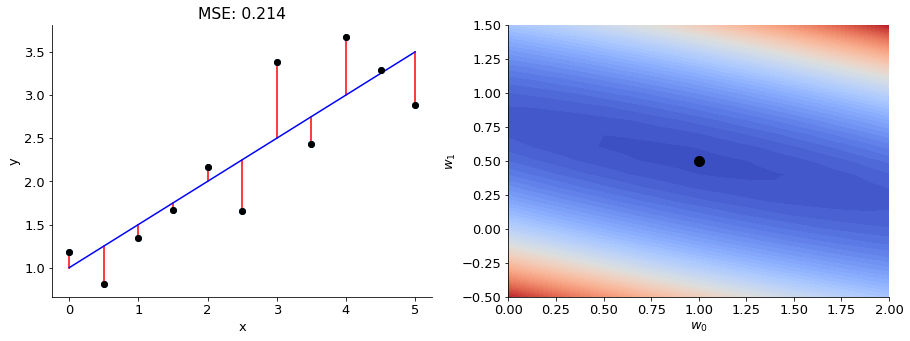

In [99]:
# Test line
w0Test = 1.0
w1Test = 0.5
yHat = lineFun(w0Test, w1Test, x)
mseFun = lambda y, yHat: np.mean((y-yHat)**2)
mseTest = mseFun(y, yHat)

fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 2, 1)
for xi, yi, yHati in zip(x, y, yHat): 
    ax.stem([xi], [yi], 'r', bottom=yHati)
ax.plot(x, yHat, 'b-')  
ax.plot(x, y, 'ko')
ax.set_xlabel('x')
ax.set_ylabel('y');
ax.set_title('MSE: ' + '%1.3f' % mseTest);
ax = plt.subplot(1, 2, 2)
ax.contourf(W0, W1, mseVals, 50, cmap=cm.coolwarm)
ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$');
ax.plot(w0Test, w1Test, 'ko', ms=10);

###  How to find the minimum in practice